# Неделя 1. Среда
## Проверка статистических гипотез

* __Главной задачей сегодняшнего дня является понимание того, как устроена философия проверки гипотез и ее шаги__. 

1. Исходная выборка/выборки из ГС
2. Сформулировать основную и альтернативную гипотезы
3. Зафиксировать уровень значимости($\alpha$) и выбрать статистику
4. Вычисляем значение статистики, которое получили по выборке
5. Так как выборка это случайность, то __Статистика тоже случайная величина, так как зависит от выборки, а значит имеет распределение__. Нам важно его знать
6. Зная распределение статистики, мы можем по полученному нами значению(пункт 4) понять, аномальное значение мы получили в конектсте нашего распределения или же нет.
7. Принять решение о справедливости гипотезы на уровне значимости $\alpha$

* Завтра нашим фокусом будут уже конкретные статистические тесты, их формулы статистики, распределения этих статистик и область применения

In [3]:
import pandas
import numpy as np
import seaborn as sns
import scipy.stats as st

from matplotlib import pyplot as plt

### 1. Гипотеза о среднем

##### 1.1 

* у вас есть веб-сервис для онлайн-курсов, и вы решили внедрить новую ML-модель рекомендаций курсов для увеличения уровня участия студентов. Вы хотите оценить, насколько новая система рекомендаций влияет на время, которое студенты проводят на платформе.

* случайным образом выбрано 100 студентов и записано количество часов, которое они провели на платформе через месяц после.

* ранее среднее время составляло 29.07 часа. Проверьте, есть ли статистически значимое улучшение на уровне значимости $\alpha = 0.05$ от ML-модели.

$H_0: \mu = 29.07$

$H_1: \mu > 29.07$

In [4]:
arr = np.array(
    [28.91, 26.45, 30.97, 32.58, 30.23, 27.26, 31.33, 30.4 , 28.29,
     27.26, 26.08, 33.19, 29.18, 27.32, 31.36, 30.74, 28.86, 27.87,
     26.37, 33.56, 29.09, 27.81, 31.07, 30.73, 28.94, 27.02, 26.76,
     33.97, 29.73, 27.86, 31.28, 30.01, 28.55, 27.1 , 26.46, 33.22,
     29.55, 27.41, 31.09, 30.88, 28.01, 27.48, 26.61, 33.19, 29.67,
     27.22, 31.02, 30.16, 28.92, 27.79, 26.58, 33.81, 29.42, 27.89,
     31.13, 30.15, 28.51, 27.21, 26.53, 33.1 , 29.14, 27.27, 31.71,
     30.84, 28.05, 27.16, 26.04, 33.7 , 29.92, 27.89, 31.87, 30.99,
     28.84, 27.5 , 26.87, 33.6 , 30.  , 27.32, 31.85, 30.67, 28.94,
     27.69, 26.65, 33.29, 29.34, 27.71, 31.62, 30.48, 28.18, 27.77,
     26.61, 33.19, 29.7 , 27.47, 31.05, 30.14, 28.4 , 27.52, 26.19,
     34.04]
    )



In [5]:
t_stat = arr.mean()
t_stat
std = arr.std(ddof=1)
n = len(arr)

* Ну что ж, нам нужна __статистика__, которая агрегирует всю информацию о выборке.

* если выбрать статистику $T(X) = \dfrac{1}{n} \sum_{i=1}^{n}x_i = \overline{X}$, то мы имеем дело со знакомым уже нам выборчным средним. Можно как минимум воспользоваться [Центральной Предельной Теоремой](https://nesrakonk.ru/central_limit_theorem-2/), при ней мы знаем, что $\overline{X} \sim N(\mu, \dfrac{\sigma^2}{n})$

В Нашем случае мы предполагам что $\mu = 29.07$, но мы не знаем дисперсию $\sigma^2$ у ГС. Поэтому приблизим выборчной дисперсией $s^2 = \dfrac{1}{n-1} \sum_{i=1}^n (x_i - \overline{X}) ^ 2$.

* 1.1.1 Посчитайте значение статистики, полученной по нашей выборке

In [6]:

t_stat = arr.mean()

* 1.1.2 С помощью [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) создайте экземпляр класса распределения вашей статистики, с ее параметрами. 

In [14]:
std = arr.std(ddof=1)
n = len(arr)
mu0 = 29.07
se = std / np.sqrt(n)
t_stat_distr = st.norm(mu0, se)

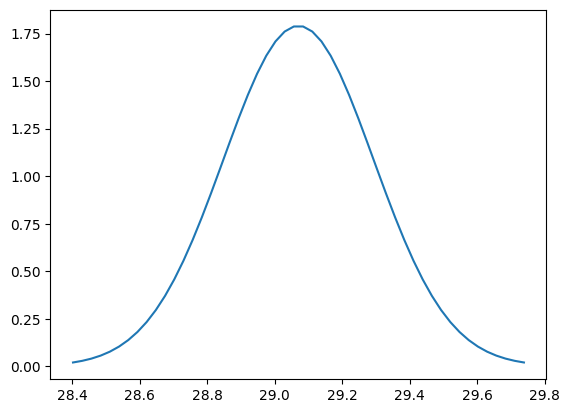

In [15]:
x = np.linspace(mu0 - 3 * se, mu0 + 3 * se)
plt.plot(x, t_stat_distr.pdf(x));

* 1.1.3 Посчитайте критическое значение для вашей статистики

In [16]:
alpha = 0.05
t_crit = t_stat_distr.ppf(1 - alpha)

* 1.1.4 Нарисуйте график распределения вашей статистики, отобразите на нем следующее:
    1. Пунктирной линией t_stat
    2. Пунктирной линией t_crit

(0.0, 1.876713718072259)

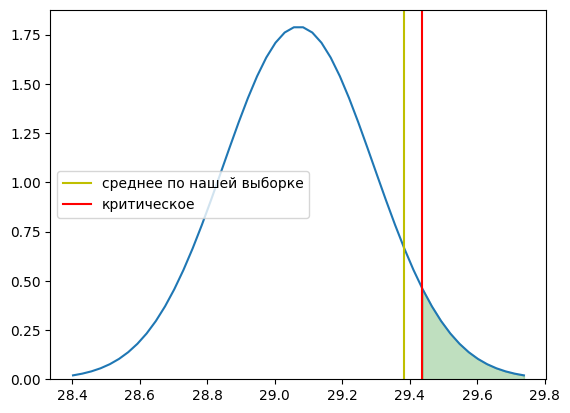

In [18]:
x = np.linspace(mu0 - 3 * se, mu0 + 3 * se)
plt.plot(x, t_stat_distr.pdf(x))
plt.axvline(t_stat, color='y', label='среднее по нашей выборке')
plt.axvline(t_crit, color='r', label='критическое')
plt.legend()
plt.fill_between(x,t_stat_distr.pdf(x),where=(x>=t_crit) & (x<=mu0+4 * se),color='g',alpha = 0.25);
plt.ylim(0)

* 1.1.5 Посчитайте p-value

In [19]:
p_value = 1 - t_stat_distr.cdf(t_stat)
p_value

0.07968676158455756

* 1.1.6 На основании значения статистики и p-value, примите решение о справедливости гипотезы

> ваш ответ

##### 1.2 В ресторане появилось новое экспериментальное блюдо, которое в планах должно заменить одно из старых блюд. Необходимо количественно оценить, лучше ли оно старого блюда, или нет. Для этого был проведен эксперимент, в рамках которого людям давали попробовать и просили оценить блюда по шкале от 1 до 10. Получились две выборки:

In [11]:
old = np.array([6, 8, 4, 7, 8, 7, 5, 9, 7, 6, 9, 8, 6, 9, 5, 7, 10, 8, 6, 7, 8, 10, 8, 7, \
                9, 6, 7, 8, 5, 9, 9, 8, 8, 6, 6, 7, 9, 7, 7, 7, 7, 8, 8, 7, 8, 6, 8, 8, 8, 8])
new = np.array([9, 8, 5, 9, 10, 9, 6, 8, 8, 8, 9, 7, 7, 8, 6, 9, 7, 9, 8, 8, 7, 7, 8, 5, 9,\
                8, 7, 7, 7, 9, 8, 8, 7, 7, 9, 8, 9, 6, 5, 9, 8, 9, 6, 9, 9, 8, 10, 8, 10, 10])

* Можно взглянуть на распределение оценок блюд

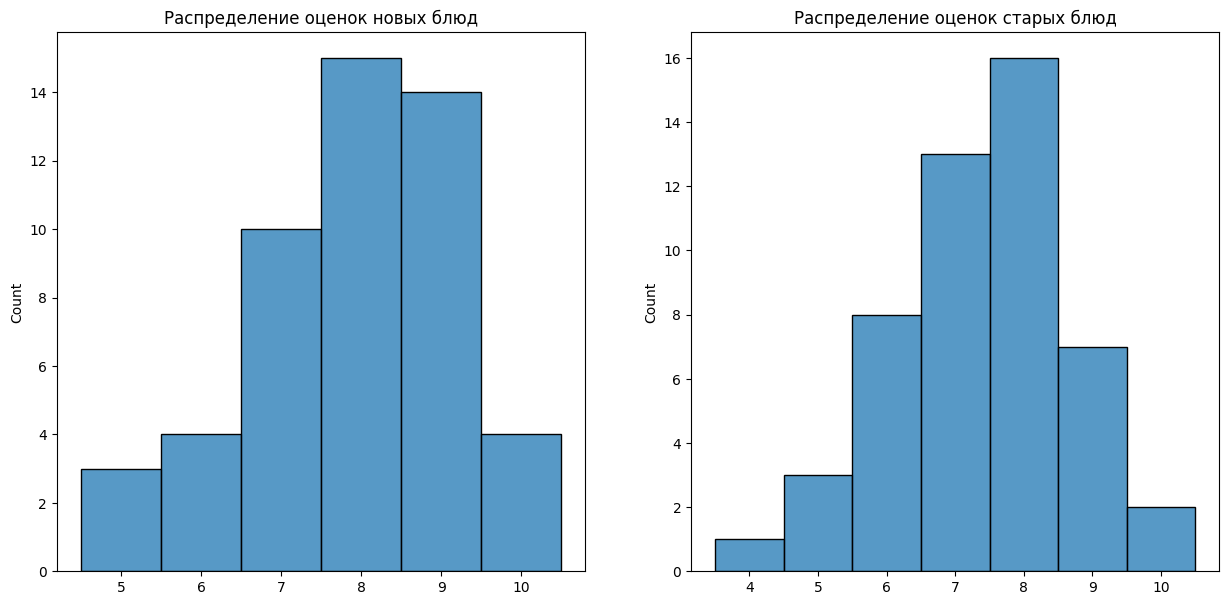

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

sns.histplot(new ,ax=axes[0], bins = np.arange(4.5, 11.5, 1))
sns.histplot(old ,ax=axes[1], bins = np.arange(3.5, 11.5, 1))

axes[0].set_title('Распределение оценок новых блюд')
axes[1].set_title('Распределение оценок старых блюд')

plt.show();

$H_0 : \mu_{new} = \mu_{old}$

$H_1 : \mu_{new} \neq \mu_{old}$  или $H_1 : \mu_{new} > \mu_{old}$ или $H_1 : \mu_{new} < \mu_{old}$

$\mu$ - это среднее по группе.  

* Иначе говоря, мы пытаемся ответить на вопрос, является ли новое блюдо лучше в среднем по Генеральной Совокупности посетителей нашего ресторана

Такие задачи называются __проверкой гипотезы__ о среднем и встречаются чаще всего

Реализуйте следующую статистику: 
    
    
$T(X) = \dfrac{\overline{X}_{new} - \overline{X}_{old}}{\sqrt{{\dfrac{s^2_{new}}{n_{new}}} + \dfrac{s^2_{old}}{n_{old}}}}$  

где $\overline{X}$ - выборочные средние, $s^2$ - выборочные дисперсии, n - количество элементов в выборке.  


Такая статистика имеет [t-распределение](https://en.wikipedia.org/wiki/Student%27s_t-distribution) или иногда называют распределением Стьюдента. По форме оно очень похоже на нормальное и если быть предельно точным, то на больших выборках t-распределение стремится к нормальному. 

$T(X) \sim t(n_{new} + n_{old} - 2)$

Обернуть все в функцию, позволяющую вычислять двухвыборочный t-тест. 
Функция должна принимать следующие аргументы: 
* `sample_1`, `sample_2` - два списка выборочными данными
* `alternative` принимает одно из трех значений: `twosided`, `left`, `right`. Аргумент позволяет контролировать вид проверяемой альтернативы. 
* `alpha` - уровень значимости

Функция должна распечатывать результат проверки аналогично примеру выше, а также возвращать значение статистики и `p_value`. 

In [13]:
def ttest(sample_1, sample_2, alternative='twosided', alpha=.05, independent=True):
    pass
    return t_stat, p_value

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add 04-03-task.ipynb`
3. Выполни команду `git commit -m "hypothesis tasks in progress"`
4. Выполни команду `git push`